# Yandex Afisha analytics

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1: Open data and general information](#OpenData&GeneralInfo)
3.   [* Step 1: Conclusion](#GeneranlInfoConclusion)
4. [Step 2: Make reports and calculate metrics](#PrepareData)
5. [* To Do List](#Step2ToDoList)
6. [* Product](#Product)
7. [* Sales](#Sales)
8. [* Marketing](#Marketing)
9.  [* Step 3: Write a general conclusion](#Step3Conclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | Your first task is to help optimize marketing expense.                                | 
|  **What we have**        | Server logs with data on Yandex.Afisha visits from June 2017 through May 2018. Dump file with all orders for the period. Marketing expenses statistics         |
|  **Main question of project**  |  How much money to invest and where to marketers?                               |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/trainer/data-analyst/lesson/da301f15-cfdb-4ac1-ba36-0872df8f9cf5/task/eb50e373-a61a-4206-89a3-49095515f6a7/)    |
| **Datasets**             | [/datasets/visits_log_us.csv](https://code.s3.yandex.net/datasets/visits_log_us.csv)  |
|                          | [/datasets/orders_log_us.csv](https://code.s3.yandex.net/datasets/orders_log_us.csv)  |
|                          | [/datasets/costs_us.csv](https://code.s3.yandex.net/datasets/costs_us.csv)            |


### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [1]:
# import all packages
import pandas as pd
import numpy as np
import random
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [2]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
#print('Python version:', python.__version__)

Pandas version library: 0.25.1
Numpy version library: 1.18.5
Seaborn version library: 0.9.0


In [3]:
# connect all datasets:
df_visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log_us.csv',
                        nrows=359400,
                        dtype={'Device': 'category'},
                        parse_dates=['End Ts','Start Ts']
                       )
df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log_us.csv',
                        nrows=50415,
                        parse_dates=['Buy Ts']                        
                       )
df_costs  = pd.read_csv('https://code.s3.yandex.net/datasets/costs_us.csv',
                        nrows=2542,
                        parse_dates=['dt']                      
                       )

In [4]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [5]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [6]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [7]:
# let's use get_info function for check information for all datasets:
get_info(df_visits)

Head:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,Device
count,359400
unique,2
top,desktop
freq,262567


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
Device,0,0.0
End Ts,0,0.0
Source Id,0,0.0
Start Ts,0,0.0
Uid,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(359400, 5)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [8]:
get_info(df_orders)

Head:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,Revenue
count,50415.000000
mean,4.999647
std,21.818359
min,0.000000
25%,1.220000
50%,2.500000
75%,4.890000
max,2633.280000


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
Buy Ts,0,0.0
Revenue,0,0.0
Uid,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(50415, 3)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [9]:
get_info(df_costs)

Head:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


,costs
count,2542.000000
mean,129.477427
std,156.296628
min,0.540000
25%,21.945000
50%,77.295000
75%,170.065000
max,1788.280000


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
source_id,0,0.0
dt,0,0.0
costs,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(2542, 3)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


#### Step1: Conclusion <a name="GeneranlInfoConclusion"></a>

Based on the above information: 
> * The data is very clean. There are no missing values or duplicate rows.
*  

### Step 2. Make reports and calculate metrics <a name="PrepareData"></a>

#### To-Do List: <a name="Step2ToDoList"></a>

> - **Product:**
- [x] How many people use it every day, week, and month?
- [X] How many sessions are there per day? (One user might have more than one session.)
- [X] What is the length of each session?
- [X] How often do users come back?
> - **Sales:**
- [X] When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)
- [X] How many orders do they make during a given period of time?
- [X] What is the average purchase size?
- [X] How much money do they bring? (LTV)
> - **Marketing:**
- [X] How much money was spent? Overall/per source/over time
- [X] How much did customer acquisition from each of the sources cost?
- [X] How worthwhile where the investments? (ROI)

#### Product <a name="Product"></a>

> - How many people use it every day, week, and month?

In [10]:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [11]:
df_visits['year']  = df_visits['Start Ts'].dt.year
df_visits['month'] = df_visits['Start Ts'].dt.month
df_visits['week']  = df_visits['Start Ts'].dt.week
df_visits['date']  = df_visits['Start Ts'].dt.date

In [12]:
# check main columns:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [13]:
# for calculate number of time active uses implement function:
def total(df, time_1, time_2, uid, filtr):
    total = (
    df.groupby([time_1, time_2])
    .agg({uid:filtr})
    .mean()
    .astype('int64')
    .values
    )
    return total

In [14]:
def xAU_df(df, time, uid, filtr):
    xAU_df = (
        df.groupby([time])
        .agg({uid:filtr})
    )
    return xAU_df

In [15]:
# DAU - the number of daily active (unique) users
# WAU - the number of weekly active users
# MAU - the number of monthly active users.
mau_total = total(df_visits, 'year', 'month', 'Uid', 'nunique')
wau_total = total(df_visits, 'year', 'week', 'Uid', 'nunique')
dau_total = total(df_visits, 'date', 'date', 'Uid', 'nunique')
print('The number of monthly active users:', mau_total)
print('The number of week active users', wau_total)
print('The number of daily active users', dau_total)

The number of monthly active users: [23228]
The number of week active users [5716]
The number of daily active users [907]


In [16]:
mau_df = xAU_df(df_visits, 'month', 'Uid', 'nunique')
wau_df = xAU_df(df_visits, 'week', 'Uid', 'nunique')
dau_df = xAU_df(df_visits, 'date', 'Uid', 'nunique')

In [17]:
def plot_xAU(xAU_total, xAU_name):
    plt.figure(figsize=(16,5))
    plt.plot(xAU_total.index, xAU_total['Uid'])
    plt.title(xAU_name)
    plt.xlabel('Time')
    plt.ylabel('Users')
    plt.show()

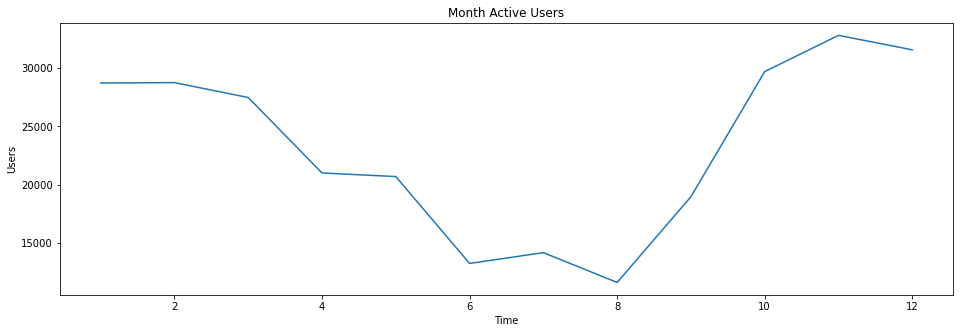

In [18]:
plot_xAU(mau_df, 'Month Active Users')

From this graph, we can see that during the summer time from June to August, user traffic drops. I think this is due to the fact that people spend more outside the computer - vacations, outdoor activities and so on.

> - How many sessions are there per day? (One user might have more than one session.)

Session per day: [987]


C:\Users\Kanafin\Anaconda3\envs\pandas\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


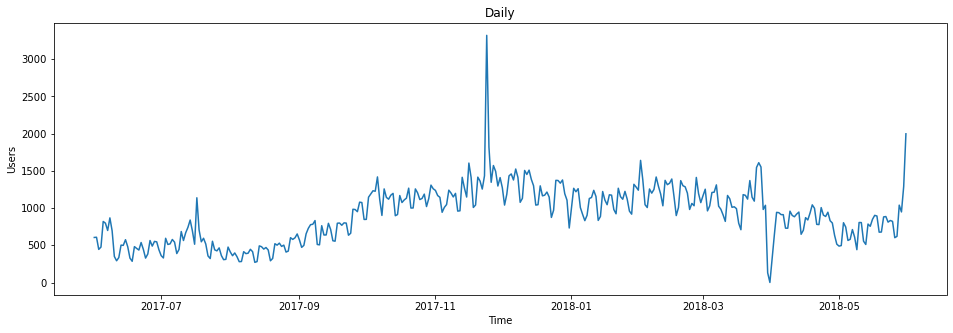

In [19]:
daily_session_total = total(df_visits, 'date', 'date', 'Uid', 'count')
daily_session_df    = xAU_df(df_visits, 'date', 'Uid', 'nunique')
print('Session per day:', daily_session_total)
plot_xAU(daily_session_df, 'Daily')

* It can be seen from this graph that the maximum peak of average daily visits occurs in December. 
* It can also be seen that the number of these daily averages begins to increase from the end of August and lasts until April-May. 
* It can be concluded that in the colder season, people begin to use the service more.

> - What is the length of each session?

In [20]:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [21]:
df_visits['Duration'] = (df_visits['End Ts'] - df_visits['Start Ts']).astype('timedelta64[m]')
df_visits['Duration_sec'] = (df_visits['End Ts'] - df_visits['Start Ts']).dt.seconds
df_visits['Duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: Duration_sec, dtype: float64

In [22]:
# let's render this data.
def drawing_data(df, column, bins, ylabel, rmin, rmax, figX, figY):
    plt.figure(figsize=[figX,figY])
    x = df[column]
    plt.hist(
        x, 
        bins=bins,
        density=True,
        range=(rmin,rmax)
    )
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel(ylabel)
    plt.show()

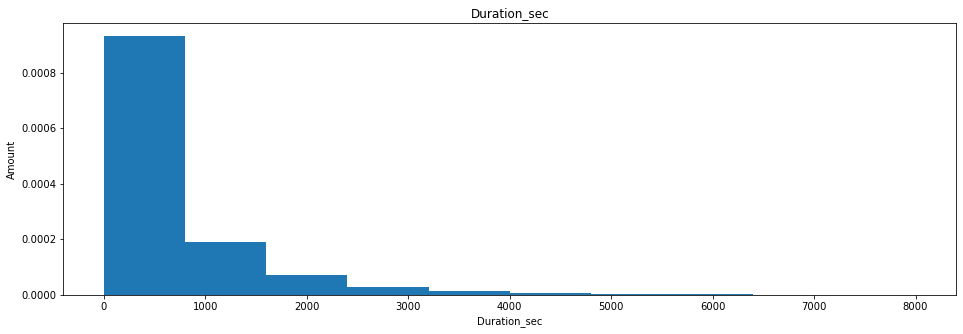

In [23]:
drawing_data(df_visits, 'Duration_sec', 10, 'Amount', 0, 8000, 16, 5)

* This graph shows that the majority of users spend from 0 to 1000 seconds per session. 
* The average time (in seconds) of a session duration is 643 seconds. Also

> - How often do users come back?

In [24]:
sticky_factor = dau_total / mau_total * 100
print('Sticky factor (month):', sticky_factor)

Sticky factor (month): [3.90477011]


In [25]:
registration_date = df_visits.groupby('Uid').agg({'Start Ts': 'min'}).reset_index()
registration_date.columns = ['Uid', 'First Visit Date']
registration_date['First Visit Month'] = registration_date['First Visit Date'].astype('datetime64[M]')
display(registration_date.head())
display(df_visits.head())

,Uid,First Visit Date,First Visit Month
0,11863502262781,2018-03-01 17:27:00,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-01


,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,Duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0.0,0


In [26]:
registration_date_right = df_visits.groupby('Uid').agg({'Start Ts': 'min'})
registration_date_right.name = 'First Visit Date'
display(registration_date_right.head())
display(df_visits.head())

,Start Ts
Uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00


,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,Duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0.0,0


In [27]:
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])
registration_date['Visits Month'] = df_visits['Start Ts'].astype('datetime64[M]')

In [28]:
first_visit_date = df_visits.groupby('Uid')['Start Ts'].min()
first_visit_date.name ='First Visit Date'
display(first_visit_date.head())
display(df_visits.head())

Uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: First Visit Date, dtype: datetime64[ns]

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,Duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0.0,0


In [29]:
df_visits = df_visits.merge(first_visit_date, on='Uid')
display(df_visits.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,Duration_sec,First Visit Date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,1680,2018-03-09 20:05:00


In [30]:
df_visits['First Visit Date'] = pd.to_datetime(df_visits['First Visit Date']).dt.date
df_visits['First Visit Month'] = df_visits['First Visit Date'].astype('datetime64[M]')
df_visits['Visit Month']       = df_visits['Start Ts'].astype('datetime64[M]')
display(df_visits.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,Duration_sec,First Visit Date,First Visit Month,Visit Month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0,1080,2017-12-20,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0,1680,2018-02-19,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,0,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,1440,2018-03-09,2018-03-01,2018-05-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,1680,2018-03-09,2018-03-01,2018-03-01


In [31]:
df_visits['Cohort Lifetime'] = df_visits['Visit Month'] - df_visits['First Visit Month']
df_visits['Cohort Lifetime'] = df_visits['Cohort Lifetime']/np.timedelta64(1, 'M')
df_visits['Cohort Lifetime'] = df_visits['Cohort Lifetime'].round().astype('int')
display(df_visits.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,Duration_sec,First Visit Date,First Visit Month,Visit Month,Cohort Lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0,1080,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0,1680,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,0,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,1440,2018-03-09,2018-03-01,2018-05-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,1680,2018-03-09,2018-03-01,2018-03-01,0


In [32]:
cohorts = df_visits.groupby(['First Visit Month', 'Cohort Lifetime']).agg({'Uid':'nunique'}).reset_index()

In [33]:
initial_user_count = cohorts[cohorts['Cohort Lifetime'] == 0][['First Visit Month', 'Uid']]
initial_user_count = initial_user_count.rename(columns={'Uid':'Cohort Users'})
display(initial_user_count.head())

,First Visit Month,Cohort Users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [34]:
cohorts = cohorts.merge(initial_user_count, on='First Visit Month')
display(cohorts.head())

,First Visit Month,Cohort Lifetime,Uid,Cohort Users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


In [35]:
cohorts['Retention'] = cohorts['Uid'] / cohorts['Cohort Users']

In [36]:
display(cohorts['Retention'].describe())

count    78.000000
mean      0.191482
std       0.347349
min       0.019036
25%       0.033861
50%       0.048277
75%       0.067133
max       1.000000
Name: Retention, dtype: float64

In [37]:
retention_pivot = cohorts.pivot_table(
    index   ='First Visit Month', 
    columns ='Cohort Lifetime', 
    values  ='Retention',
    aggfunc ='sum'
)

In [38]:
display(retention_pivot.head(10))

Cohort Lifetime,0,1,2,3,4,5,6,7,8,9,10,11
First Visit Month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


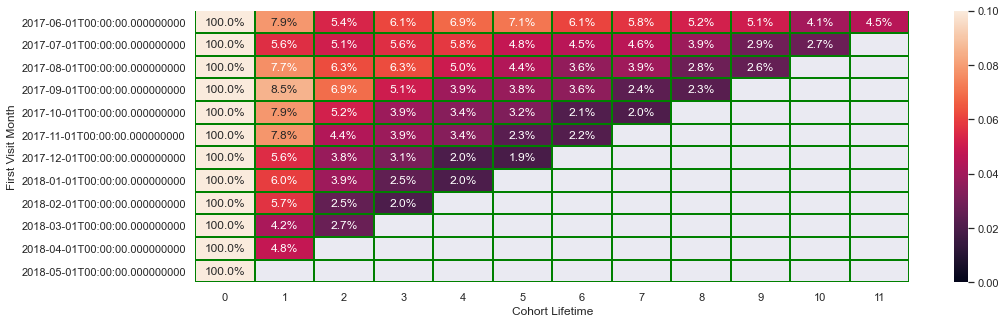

In [39]:
sns.set(style='dark')
plt.figure(figsize=(16,5))
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linewidth=1,
    linecolor='green',
    vmax=0.1,
    vmin=0
)
plt.show()

* From the table of the retention rate, it can be seen that for all cohorts, it gradually decreases. 
* If there are certain "ups" by months within the cohort, but in general, there is a trend towards a decrease in the retention rate.

#### Sales <a name="Sales"></a>

> - When do people start buying?

In [40]:
df_orders_visits = df_orders.merge(df_visits, on='Uid', how='left')
display(df_orders.head())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [41]:
first_orders = df_orders.groupby('Uid')['Buy Ts'].min()
first_orders.name = 'First Order Ts'
display(first_orders.head())

Uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: First Order Ts, dtype: datetime64[ns]

In [42]:
df_orders_visits = df_orders_visits.merge(first_orders, on='Uid')
display(df_orders_visits.head())

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,year,month,week,date,Duration,Duration_sec,First Visit Date,First Visit Month,Visit Month,Cohort Lifetime,First Order Ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,2017-06-01,2.0,120,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,11.0,660,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,2017-06-01,9.0,540,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,19.0,1140,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,2017-06-01,28.0,1680,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 07:58:00


In [43]:
df_orders_visits['First Order Date'] = df_orders_visits['First Order Ts'].dt.date
display(df_orders_visits.head())

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,year,month,week,date,Duration,Duration_sec,First Visit Date,First Visit Month,Visit Month,Cohort Lifetime,First Order Ts,First Order Date
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,2017-06-01,2.0,120,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,11.0,660,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,2017-06-01,9.0,540,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,19.0,1140,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,2017-06-01,28.0,1680,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 07:58:00,2017-06-01


In [44]:
df_orders_visits['Days of First Order'] = (df_orders_visits['First Order Date'] - df_orders_visits['First Visit Date']).dt.days
display(df_orders_visits.head())

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,year,month,week,date,Duration,Duration_sec,First Visit Date,First Visit Month,Visit Month,Cohort Lifetime,First Order Ts,First Order Date,Days of First Order
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,2017-06-01,2.0,120,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:10:00,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,11.0,660,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:25:00,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,2017-06-01,9.0,540,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:27:00,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,19.0,1140,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:29:00,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,2017-06-01,28.0,1680,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 07:58:00,2017-06-01,0


In [45]:
df_orders_visits['Conversion'] = df_orders_visits['First Order Date'] - df_orders_visits['First Visit Date']
df_orders_visits['Conversion'] = df_orders_visits['Conversion'] / np.timedelta64(1, 'D').astype(int)
display(df_orders_visits.head())

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,year,month,week,...,Duration,Duration_sec,First Visit Date,First Visit Month,Visit Month,Cohort Lifetime,First Order Ts,First Order Date,Days of First Order,Conversion
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,...,2.0,120,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:10:00,2017-06-01,0,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,...,11.0,660,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:25:00,2017-06-01,0,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,...,9.0,540,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:27:00,2017-06-01,0,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,...,19.0,1140,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:29:00,2017-06-01,0,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,...,28.0,1680,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 07:58:00,2017-06-01,0,0 days


- [] How many orders do they make during a given period of time?

In [46]:
df_orders_visits['First Order Month'] = df_orders_visits['First Order Date'].astype('datetime64[M]')
df_orders_visits['Order Month']       = df_orders_visits['Buy Ts'].astype('datetime64[M]')
display(df_orders_visits.head())

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,year,month,week,...,First Visit Date,First Visit Month,Visit Month,Cohort Lifetime,First Order Ts,First Order Date,Days of First Order,Conversion,First Order Month,Order Month
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:10:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:25:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:27:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:29:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 07:58:00,2017-06-01,0,0 days,2017-06-01,2017-06-01


In [47]:
orders_registration         = df_orders_visits.groupby(['First Order Month', 'Order Month']).agg({'Uid':'nunique'})
orders_registration_cohorts = orders_registration.pivot_table(
    index   = 'First Order Month',
    columns = 'Order Month', 
    values  = 'Uid',
    aggfunc = 'sum'
)
display(orders_registration_cohorts.head())

Order Month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
First Order Month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN


In [48]:
def draw_pivot(df):
    sns.set(style='white')
    plt.figure(figsize=(16,8))
    sns.heatmap(
        df,
        annot=True,
        xticklabels=df.columns.to_series().dt.strftime('%Y-%m'),
        yticklabels=df.index.to_series().dt.strftime('%Y-%m'),
        fmt='g',
        linewidths='1',
        linecolor='green'
    )
    plt.show()

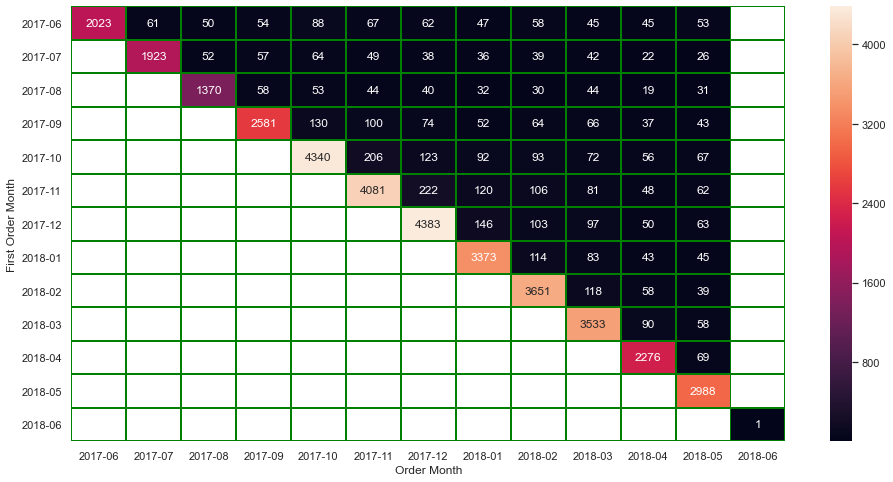

In [49]:
draw_pivot(orders_registration_cohorts)

* The table shows that the main sales months are from October to December. 
* The growth of sales by 2 times begins in October, in November there is a slight decline, but the maximum peak falls on December.

- [X] What is the average purchase size?

In [50]:
print('Average purchase size:', df_orders['Revenue'].mean())

Average purchase size: 4.999646930477041


In [51]:
display(df_orders_visits.head())

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,year,month,week,...,First Visit Date,First Visit Month,Visit Month,Cohort Lifetime,First Order Ts,First Order Date,Days of First Order,Conversion,First Order Month,Order Month
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:10:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:25:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:27:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:29:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 07:58:00,2017-06-01,0,0 days,2017-06-01,2017-06-01


In [52]:
monthly_purchases = df_orders_visits.groupby(['First Order Month', 'Order Month']).agg({'Revenue':'nunique'})
display(monthly_purchases.head())

Revenue
First Order Month Order Month         
2017-06-01        2017-06-01       195
                  2017-07-01        63
                  2017-08-01        67
                  2017-09-01        95
                  2017-10-01       103

In [53]:
monthly_purchases_cohorts = df_orders_visits.pivot_table(
    index='First Order Month',
    columns='Order Month',
    values='Revenue',
    aggfunc='sum'
)
display(monthly_purchases_cohorts.head())

Order Month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
First Order Month,,,,,,,,,,,,,
2017-06-01,148121.29,155869.55,114898.83,374481.76,351833.14,220982.19,360711.17,205886.65,249773.22,213452.03,223638.22,98003.55,NaN
2017-07-01,NaN,98117.69,49721.69,150276.88,53237.99,20086.14,24035.80,12047.39,15702.74,28358.54,37962.30,26006.76,NaN
2017-08-01,NaN,NaN,46941.52,41703.29,35533.29,42513.98,67296.35,31777.54,22592.89,50055.81,21963.50,15413.34,NaN
2017-09-01,NaN,NaN,NaN,172027.83,156022.73,58526.52,819024.08,97500.81,124314.70,166261.93,57471.87,28992.16,NaN
2017-10-01,NaN,NaN,NaN,NaN,90862.84,37716.49,12986.03,14660.09,11127.24,9848.11,9951.88,12321.68,NaN


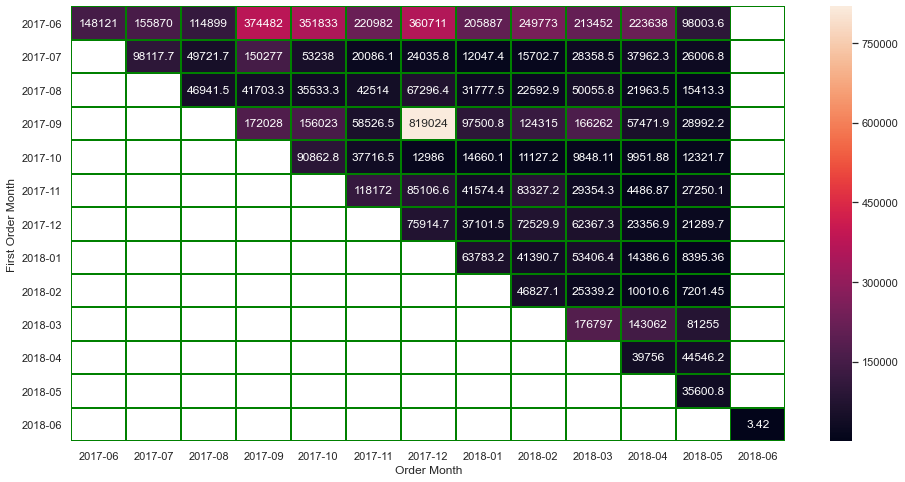

In [54]:
draw_pivot(monthly_purchases_cohorts)

* From the table of the ratio of the month of the first purchase and the purchase for the month, it can be seen that the maximum income falls on the ratio of September-December. That is, the first purchase of users takes place in September, and these users bring the maximum income in December.

- [x] How much money do they bring? (LTV)

In [55]:
display(df_orders_visits.head())

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,year,month,week,...,First Visit Date,First Visit Month,Visit Month,Cohort Lifetime,First Order Ts,First Order Date,Days of First Order,Conversion,First Order Month,Order Month
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:10:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:25:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:27:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 00:29:00,2017-06-01,0,0 days,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,...,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01 07:58:00,2017-06-01,0,0 days,2017-06-01,2017-06-01


In [56]:
cohort_sizes = df_orders_visits.groupby('First Order Month').agg({'Uid':'nunique'}).reset_index()
cohort_sizes.columns = ['First Order Month', 'n_Buyers']
display(cohort_sizes.head())

,First Order Month,n_Buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [57]:
display(df_orders.head())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [58]:
df_orders['Order Month'] = df_orders['Buy Ts'].astype('datetime64[M]')
first_orders = df_orders.groupby('Uid').agg({'Order Month':'min'}).reset_index()
first_orders.columns = ['Uid','First Order Month']
display(first_orders.head())

,Uid,First Order Month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [59]:
df_orders_results = pd.merge(df_orders, first_orders, on='Uid')
df_orders_results.head()

,Buy Ts,Revenue,Uid,Order Month,First Order Month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [60]:
df_cohorts = df_orders_results.groupby(['First Order Month', 'Order Month']).agg({'Revenue':'sum'}).reset_index()
df_cohorts.head()

,First Order Month,Order Month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [61]:
results = pd.merge(cohort_sizes, df_cohorts, on='First Order Month')
results.head()

,First Order Month,n_Buyers,Order Month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [62]:
margin_rate = 0.50

results['Gross Profit'] = results['Revenue'] * margin_rate
results['Cohort Age']   = (results['Order Month'] - results['First Order Month']) / np.timedelta64(1, 'M')
results['Cohort Age']   = results['Cohort Age'].round().astype('int')
results['LTV']          = results['Gross Profit'] / results['n_Buyers']
results.head()

,First Order Month,n_Buyers,Order Month,Revenue,Gross Profit,Cohort Age,LTV
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265


In [114]:
print(results['LTV'].describe())

count    78.000000
mean      0.560266
std       0.854743
min       0.026939
25%       0.092500
50%       0.187563
75%       0.363514
max       3.005109
Name: LTV, dtype: float64


In [63]:
report = results.pivot_table(
    index='First Order Month', 
    columns='Cohort Age', 
    values='LTV', 
    aggfunc='mean'
).round()

report.cumsum(axis=1).fillna('') 

Cohort Age,0,1,2,3,4,5,6,7,8,9,10,11
First Order Month,,,,,,,,,,,,
2017-06-01,2.0,2,2,2,3,3,3,3,3,3,3,3
2017-07-01,3.0,3,3,3,3,3,3,3,3,3,3,
2017-08-01,3.0,3,3,3,3,3,3,3,3,3,,
2017-09-01,3.0,4,4,6,6,6,6,6,6,,,
2017-10-01,3.0,3,3,3,3,3,3,3,,,,
2017-11-01,3.0,3,3,3,3,3,3,,,,,
2017-12-01,2.0,2,2,3,3,3,,,,,,
2018-01-01,2.0,2,2,2,2,,,,,,,
2018-02-01,2.0,2,2,2,,,,,,,,


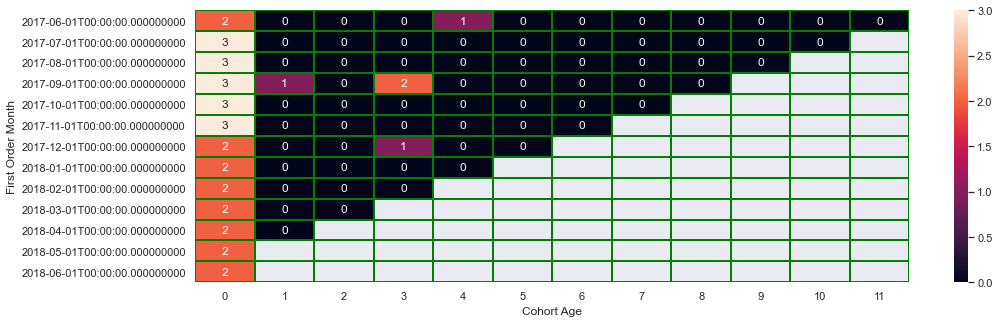

In [112]:
sns.set(style='dark')
plt.figure(figsize=(16,5))
sns.heatmap(
    report,
    annot=True,
    fmt='g',
    linewidth=1,
    linecolor='green'
    #vmax=8.0,
    #vmin=0
)
plt.show()

#### Marketing <a name="Marketing"></a>

- [x] How much money was spent? Overall/per source/over time

In [65]:
display(df_costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [66]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])
display(df_costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [67]:
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')

In [68]:
display(df_costs.head())

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [69]:
# How much money was spent over time.
monthly_costs = df_costs.groupby(['month']).agg({'costs':'sum'})
monthly_costs = monthly_costs.rename(columns={'costs':'Monthly Costs'})
display(monthly_costs.head())

,Monthly Costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


In [70]:
results = pd.merge(results, monthly_costs, left_on='First Order Month', right_on='month')
display(results.head())

,First Order Month,n_Buyers,Order Month,Revenue,Gross Profit,Cohort Age,LTV,Monthly Costs
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,18015.0
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,18015.0


In [71]:
results['CAC month'] = results['Monthly Costs'] / results['n_Buyers']
display(results.head())

,First Order Month,n_Buyers,Order Month,Revenue,Gross Profit,Cohort Age,LTV,Monthly Costs,CAC month
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,18015.0,8.905091


In [73]:
# How much money was spent overall.
amount_costs = df_costs['costs'].sum()
print("Overall was spent:", amount_costs)

Overall was spent: 329131.62


- [x] How much did customer acquisition from each of the sources cost?

In [74]:
source_costs = df_costs.groupby(['source_id']).sum()
source_costs = source_costs.sort_values(by='costs', ascending=False).reset_index()
source_costs = source_costs.rename(columns={'costs':'Source Costs', 'source_id':'Source Id'})
print(source_costs.head(10))

   Source Id  Source Costs
0          3     141321.63
1          4      61073.60
2          5      51757.10
3          2      42806.04
4          1      20833.27
5         10       5822.49
6          9       5517.49


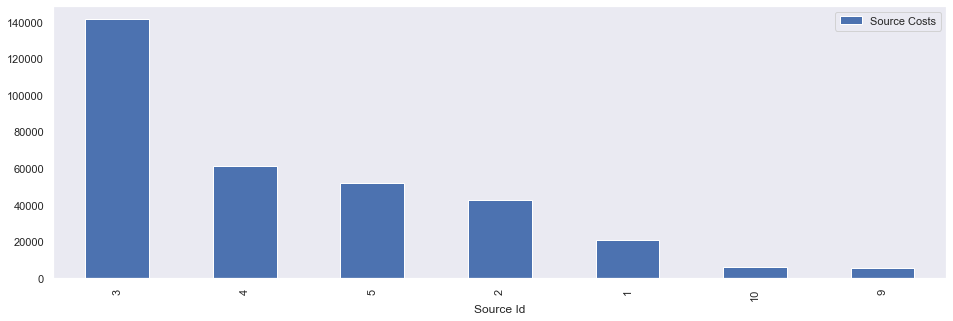

In [75]:
source_costs.plot(x='Source Id', kind='bar', figsize=(16,5))
plt.show()

* The most expensive source of advertising is Source 3.

In [76]:
ads_sizes = df_visits.groupby('Source Id').agg({'Uid':'nunique'})
ads_sizes = ads_sizes.sort_values(by='Uid', ascending=False).reset_index()
ads_sizes = ads_sizes.rename(columns={'Uid':'n_Clients'})
display(ads_sizes)

,Source Id,n_Clients
0,4,83525
1,3,74756
2,5,56974
3,2,26245
4,1,18999
5,9,9264
6,10,8067
7,7,34
8,6,6


In [77]:
results_source_ads = pd.merge(source_costs, ads_sizes, on='Source Id')
results_source_ads = results_source_ads.sort_values(by='Source Costs', ascending=False)
display(results_source_ads.head(10))

,Source Id,Source Costs,n_Clients
0,3,141321.63,74756
1,4,61073.60,83525
2,5,51757.10,56974
3,2,42806.04,26245
4,1,20833.27,18999


In [93]:
results_source_ads['CAC Source'] = results_source_ads['Source Costs'] / results_source_ads['n_Clients']
display(results_source_ads.head(10))

,Source Id,Source Costs,n_Clients,CAC Source
0,3,141321.63,74756,1.890439
1,4,61073.60,83525,0.731201
2,5,51757.10,56974,0.908434
3,2,42806.04,26245,1.631017
4,1,20833.27,18999,1.096546
5,10,5822.49,8067,0.721766
6,9,5517.49,9264,0.595584


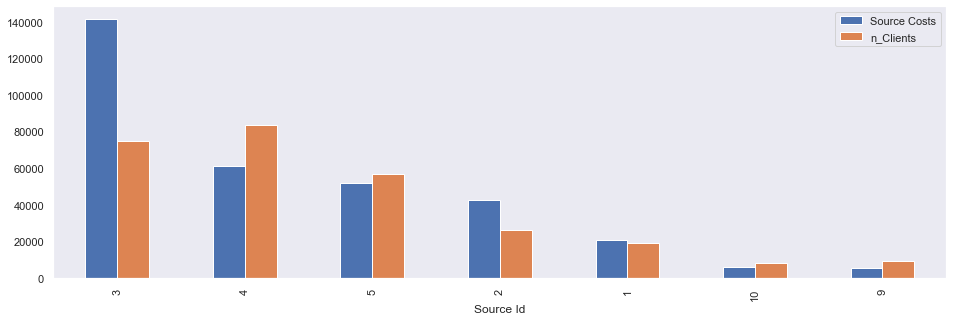

In [101]:
results_source_ads.plot(
    x='Source Id', 
    y=['Source Costs', 'n_Clients'], 
    kind='bar', 
    figsize=(16,5))
plt.show()

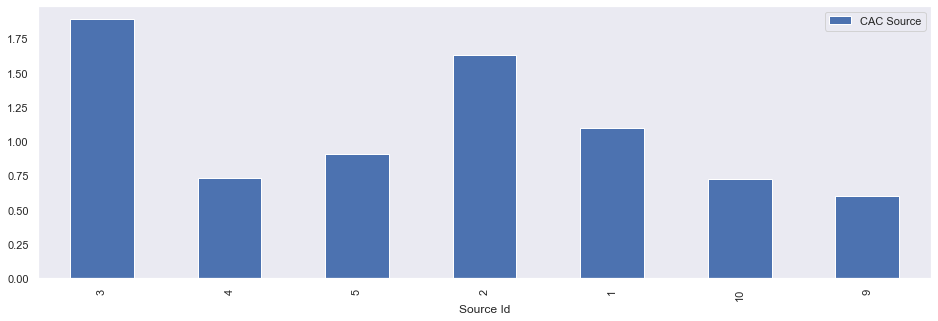

In [100]:
results_source_ads.plot(
    x='Source Id', 
    y='CAC Source', 
    kind='bar', 
    figsize=(16,5))
plt.show()

* From the two previous top graphs, we can conclude that the highest costs are for advertising sources - 3 and 2. 
* At the same time, sources that require less costs, but attract more user attention, are 4, 5 and 9.

- [] How worthwhile where the investments? (ROI)

In [80]:
results['ROMI'] = results['LTV'] / results['CAC month']

In [81]:
display(results.head())

,First Order Month,n_Buyers,Order Month,Revenue,Gross Profit,Cohort Age,LTV,Monthly Costs,CAC month,ROMI
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0,8.905091,0.265265
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,18015.0,8.905091,0.027250
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,18015.0,8.905091,0.024572
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,18015.0,8.905091,0.053603
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,18015.0,8.905091,0.057413


In [82]:
 results_pivot = results.pivot_table(
     index='First Order Month',
     columns='Cohort Age',
     values='ROMI',
     aggfunc='mean')

display(results_pivot)

Cohort Age,0,1,2,3,4,5,6,7,8,9,10,11
First Order Month,,,,,,,,,,,,
2017-06-01,0.265265,0.027250,0.024572,0.053603,0.057413,0.041297,0.053365,0.032655,0.031062,0.034014,0.032075,0.014422
2017-07-01,0.316811,0.017670,0.032868,0.018922,0.009319,0.008226,0.006336,0.007476,0.008499,0.007756,0.008206,NaN
2017-08-01,0.244373,0.021860,0.021234,0.018121,0.022881,0.013132,0.009757,0.018757,0.013533,0.008706,NaN,NaN
2017-09-01,0.298916,0.059184,0.027587,0.210545,0.021212,0.034267,0.037155,0.012876,0.009744,NaN,NaN,NaN
2017-10-01,0.298933,0.032008,0.011434,0.009388,0.009054,0.007191,0.005067,0.006898,NaN,NaN,NaN,NaN
2017-11-01,0.277466,0.021490,0.010742,0.017491,0.007967,0.002900,0.006186,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.271007,0.014892,0.052912,0.060930,0.017898,0.019335,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.208086,0.014831,0.015310,0.007184,0.003155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.231903,0.015524,0.004380,0.004136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
results_pivot.cumsum(axis=1)

Cohort Age,0,1,2,3,4,5,6,7,8,9,10,11
First Order Month,,,,,,,,,,,,
2017-06-01,0.265265,0.292515,0.317087,0.370690,0.428102,0.469399,0.522764,0.555419,0.586481,0.620494,0.652569,0.666991
2017-07-01,0.316811,0.334481,0.367349,0.386271,0.395590,0.403816,0.410152,0.417628,0.426127,0.433883,0.442089,NaN
2017-08-01,0.244373,0.266233,0.287467,0.305588,0.328469,0.341601,0.351358,0.370115,0.383648,0.392354,NaN,NaN
2017-09-01,0.298916,0.358100,0.385687,0.596232,0.617445,0.651711,0.688866,0.701743,0.711487,NaN,NaN,NaN
2017-10-01,0.298933,0.330940,0.342375,0.351763,0.360817,0.368008,0.373075,0.379973,NaN,NaN,NaN,NaN
2017-11-01,0.277466,0.298955,0.309697,0.327189,0.335156,0.338056,0.344242,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.271007,0.285900,0.338812,0.399742,0.417640,0.436976,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.208086,0.222917,0.238227,0.245411,0.248566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.231903,0.247427,0.251807,0.255944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


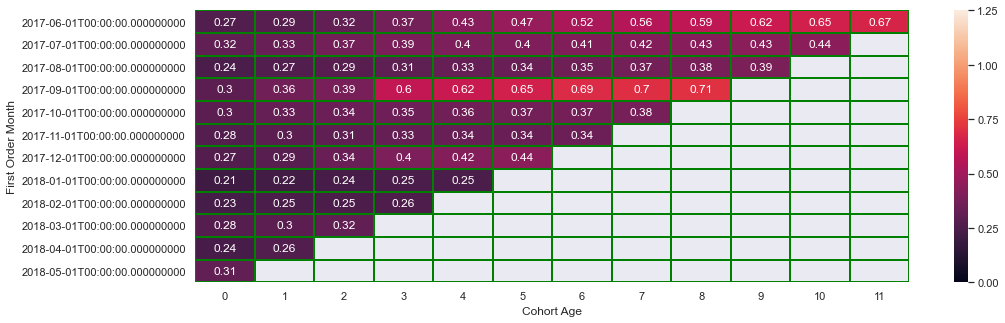

In [110]:
sns.set(style='dark')
plt.figure(figsize=(16,5))
sns.heatmap(
    results_pivot.cumsum(axis=1),
    annot=True,
    #fmt='d',
    linewidth=1,
    linecolor='green',
    vmax=1.25,
    vmin=0
)
plt.show()

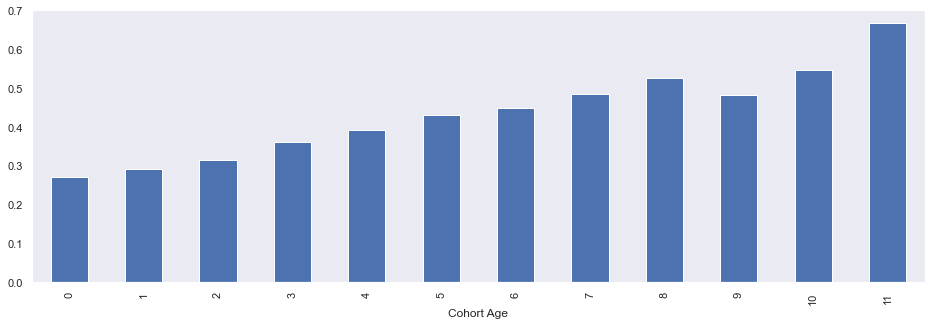

In [86]:
results_pivot.cumsum(axis=1).mean(axis=0).plot(x='Cohort Age', kind='bar', figsize=(16,5))
plt.show()

* Based on the average scores for each cohort, it can be seen that the average ROMI score is increasing. 
* In the 11th cohort, this figure reaches 0.67

#### Step 3. Write a general conclusion. <a name="Step3Conclusion"></a>

* Based on cohort analysis, it was found that the number of users is decreasing and the level of user retention is decreasing. At the same time, if our service is focused on displaying advertising, then there is no point in investing in more expensive advertising.
* The main peak of sales falls on the period from October to December. December is the peak of sales. I associate this with the fact that the time for the holidays begins in October, October is Halloween, then preparation for Christmas and, as a result, the New Year.
* December brings the maximum income for the company. People start getting ready in September, making their first purchase. Thus, I would suggest focusing on active advertising for this cohort, which makes its first purchase in September.
* The main recommendation for the marketing department is the need to reduce the costs of advertising sources, 3 and 2. And at the same time, increase the financing of costs for advertising sources 4, 5 and 9.
P.S. True, a more detailed decoding of the types of advertising sources is needed. In the context of the assignment, this is unknown. I would also like to know how much income sources of advertising bring.